# 1.0 Loading packages and importing Data

In [5]:
import os

# Specify the path of the folder you want to work with
folder_path = "C:\\Users\\DENIS OCHIENG'\\Desktop\\Training\\Python_2"

# Create the folder if it doesn't already exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Change the current working directory to the specified folder
os.chdir(folder_path)

# Now you can perform operations on files in this folder
# For example, you can list all the files in the folder
for filename in os.listdir():
    print(filename)

supermarkt_sales.csv
supermarkt_sales_dirty.csv


* Notes segment
A further explanation of the above code

import os: This line imports the built-in Python os module, which provides a way to interact with the file system and operating system.

folder_path = "C:\\Users\\DENIS OCHIENG'\\Desktop\\Training\\Python_2": This line sets the variable folder_path to the string value of the file path you want to work with. In this case, it's set to "C:\\Users\\DENIS OCHIENG'\\Desktop\\Training\\Python_2", which is a path to a folder on the desktop.

if not os.path.exists(folder_path):: This line checks if the folder specified by folder_path exists. If it doesn't exist, the code block following this line is executed.

os.makedirs(folder_path): This line creates the folder specified by folder_path if it doesn't already exist. The os.makedirs() function creates any missing directories in the path, so you don't need to create each directory separately.

os.chdir(folder_path): This line changes the current working directory to the folder specified by folder_path. This means that any file operations you perform after this line will be relative to this folder.

for filename in os.listdir():: This line uses the os.listdir() function to list all the files in the current working directory (which is now the folder specified by folder_path). This function returns a list of all the files in the directory.

print(filename): This line prints each filename in the list of files returned by os.listdir(). In other words, it lists all the files in the specified folder.

So, overall, this code creates a folder if it doesn't exist, sets it as the current working directory, and then lists all the files in that folder.

In [6]:
# Import packages
import pandas as pd
import numpy as np

In [8]:
# Call your dataFrame to Juypter Notebook
df = pd.read_csv('supermarkt_sales_dirty.csv')

In [ ]:
# Another way of uploading files
df_clean = pd.read_csv("C:\\Users\\DENIS OCHIENG'\\Desktop\\Training\\Python_2")

In [16]:
df.head(2)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,05/01/2021,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,08/03/2021,10:29,Cash,76.40,4.761905,3.8200,9.6


# 2.0 Data Preparation & Cleaning

## a. Null values - Imputation Method

In [44]:
# Checking for total number of null values in the dataset
# so basically isnull function checks all null values while the sum() functions
# sums the total null values for each variable in the dataset.

df.isnull().sum()


Invoice ID                 133
Branch                      33
City                        33
Customer_type               33
Gender                      33
Product_line                33
Unit price                  33
Quantity                    33
Tax 5%                      33
Total                       33
Date                        33
Time                        33
Payment                    199
cogs                        33
gross margin percentage     33
gross income                75
Rating                      33
dtype: int64

Notes segment
In this dataset in the column 'Product_line', the entry for payment type was not keyed in for those who selected 'Sports and travel' as their product_line. If we drop null values for the entire dataset we will lose the 
information on Sprots and travel.
So in this case scenario we drop the null values but based on the column product-line.

In [45]:
# This function check for all unique elements in each variable
df.nunique()

Invoice ID                 900
Branch                       3
City                         3
Customer_type                2
Gender                       4
Product_line                 9
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               949
Rating                      61
dtype: int64

In [48]:
# We want to check if our unique identifier column 'INVOICE ID' is indeed unique

duplicates = df[df.duplicated(subset=['Invoice ID'], keep=False)]
duplicated_names = duplicates['Invoice ID'].unique()
duplicated_names

array([nan], dtype=object)

In [9]:
# In this case we want to drop null values based on our unique identifier
# drop rows that are entirely null
df_cleaned = df.dropna(how='all')

# drop rows with null values in the 'Invoice ID' column
df_cleaned = df_cleaned.dropna(subset=['Invoice ID'])

# display the cleaned dataframe
df_cleaned.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer_type                0
Gender                       0
Product_line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                    157
cogs                         0
gross margin percentage      0
gross income                42
Rating                       0
dtype: int64

Notes segment
The code above first drops rows that are entirely null using dropna with how='all'. Then, it drops rows with null values in the 'Invoice ID' column by passing the column name as a list to the subset parameter of dropna.

It is important to note that we have given our clean dataFrame a new name that is 'df_cleaned' this is what we will now use in the analysis as it consist of cleaned dataset that is free from the null values that are not needed

Notes segment
The formual in this markdown cell can be used in an instance you want to keep
the entire null values for a given column while dropping for other columns

#drop rows with all null values
df_cleaned = df.dropna(how='all')

#drop rows with null values in all columns except 'Payment'
df_cleaned = df_cleaned.dropna(subset=[col for col in df_cleaned.columns if col != 'Payment'])

#display the cleaned dataframe
df_cleaned.isnull().sum()

Notes segment
In summary, if we were to drop null values for the entire dataset without any specification we normally use the function .dropna() and we put with the df or the name we have given our dataFrame eg in our case df.dropna()
The problem with this is that it drops all rows that have any null or missing values and in some cases you are likely to drop rows that contained null values but were still important.

## b. Null values - Replace by Mean Method

In [70]:
# When you run the null values you notice there are null values in the
# grosss income column which might affect our results.
# When a dataset is more than 250 we are allowed to remove null but in a case
# the dataset is low than 250 we replace the null values.
# In this case we want to replace the null values with the mean of the given column

# calculate the mean of the 'gross income' column
mean_gross_income = df_cleaned['gross income'].mean()

# replace missing values with the mean
df_cleaned['gross income'].fillna(mean_gross_income, inplace=True)

# First let check again the number of missing values
df_cleaned.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer_type                0
Gender                       0
Product_line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                    157
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
dtype: int64

* Notes segment
In the code above, we first calculate the mean of the 'gross income' column using the mean method. Then, we use the fillna function to replace missing values in the 'gross income' column with the mean using the inplace=True parameter to modify the dataframe in place. Finally, we check the total number of null values in the column 'gross income' to confirm if they are replaced by the mean value.

## c. Dealing with typos and errors

In [71]:
# The first step with typos is to run frequency and check if there are
# any element that are not needed for analysis
# Since we will analyze 'Product_line' lets check if it contains any typo
print(df_cleaned['Product_line'].value_counts())


Fashion accessories       164
Sports and travel         157
Food and beverages        151
Electronic accessories    149
Home and lifestyle        138
Health and beauty         137
beverages                   2
Food                        1
Food and                    1
Name: Product_line, dtype: int64


* Notes segment
From the above code we can observe typos in 'beverages', 'food', and 'food and'.
So we want to replace the typos with the correct name which in the case is 'Food and beverages'

In [41]:

# Correct wrong entries
# In the code below we replace wrong entries with the correct entries

df_cleaned['Product_line'] = df_cleaned['Product_line'].replace({'Food': 'Food and beverages',
                                                                 'Food and': 'Food and beverages', 
                                                                 'beverages': 'Food and beverages'})


# Now we run again the frequency to observe if the wrong entry is still present

print(df_cleaned['Product_line'].value_counts())

Fashion accessories       164
Sports and travel         157
Food and beverages        155
Electronic accessories    149
Home and lifestyle        138
Health and beauty         137
Name: Product_line, dtype: int64


In [73]:
print(df_cleaned['Gender'].value_counts())

Male      454
Female    444
Mal         1
Femal       1
Name: Gender, dtype: int64


In [74]:
# From the code above we observe two typos; 'Femal' and 'Mal'

df_cleaned['Gender'] = df_cleaned['Gender'].replace({'Mal': 'Male',
                                                                'Femal': 'Female'})


# The now run to see if the changes have been implemented
print(df_cleaned['Gender'].value_counts())

Male      455
Female    445
Name: Gender, dtype: int64


## d. Finding and Dealing with Outliers

* Notes segment
There are several ways to look for outliers in a given dataset in Jupyter notebook. Here are some common methods:

Boxplots: A boxplot is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile, median, third quartile, and maximum). Outliers are defined as points beyond the whiskers of the boxplot. You can use the boxplot() function in the matplotlib library to create a boxplot for a given variable.

Histograms: A histogram is a graphical representation of the distribution of data. By examining the shape of the histogram, you can identify whether there are outliers or not. If there is a long tail to one side or if the distribution is skewed, it may indicate the presence of outliers. You can use the hist() function in the matplotlib library to create a histogram for a given variable.

Scatter plots: Scatter plots can be used to identify outliers in bivariate data. Outliers are the points that fall far away from the majority of the data points. You can use the scatter() function in the matplotlib library to create a scatter plot for two variables.

Z-scores: A z-score measures how many standard deviations a data point is from the mean. A z-score greater than 3 or less than -3 is typically considered an outlier. You can use the zscore() function in the scipy.stats library to calculate the z-scores for a given variable.

Interquartile range (IQR): The IQR is the difference between the first quartile and the third quartile. Any data point that falls more than 1.5 times the IQR below the first quartile or above the third quartile is considered an outlier. You can use the quantile() function in pandas to calculate the quartiles and the IQR for a given variable, and then use boolean indexing to identify the outliers.

In [81]:
# We are looking for outliers in the column 'gross income'

# calculate the quartiles and IQR
Q1 = df_cleaned['gross income'].quantile(0.25)
Q3 = df_cleaned['gross income'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers
outliers = df_cleaned[(df['gross income'] < Q1 - 1.5*IQR) | (df_cleaned['gross income'] > Q3 + 1.5*IQR)]

print(outliers['gross income'])

174     47.790
175     49.490
371     49.650
378     47.720
455     48.605
590     49.260
732     48.750
825     48.685
1029    48.690
Name: gross income, dtype: float64


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [79]:
# Confirm by comparing the outlier to the mean

df_cleaned['gross income'].mean()

15.290526223776224

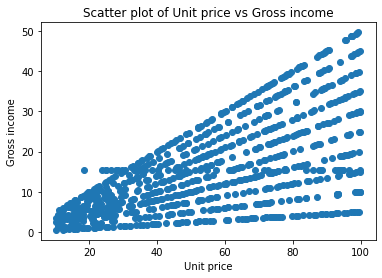

In [83]:
# The scatter plot method

import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(df_cleaned['Unit price'], df_cleaned['gross income'])

# set the axis labels and title
plt.xlabel('Unit price')
plt.ylabel('Gross income')
plt.title('Scatter plot of Unit price vs Gross income')

# show the plot
plt.show()

* Notes Segment
How to Handle the Outliers

What to do with the outliers depends on the context and the purpose of the analysis. Here are a few common approaches:

Remove them: In some cases, it may be appropriate to remove the outliers from the dataset, especially if they are errors or anomalies that are unlikely to represent the underlying population.

Keep them: In other cases, it may be important to keep the outliers in the dataset, especially if they represent real and meaningful observations. Outliers can sometimes provide valuable insights into the underlying data generating process.

Transform them: Sometimes, it may be appropriate to transform the outliers, for example by capping them at a certain threshold, or by using a transformation such as a log transformation to make the distribution more normal.

Investigate them: It may also be important to investigate the outliers further to determine if they are genuine or erroneous, and to understand why they are occurring. This can involve looking at the data more closely, consulting with domain experts, or conducting additional analysis.

In [2]:
# Import packages for the graph to use in histogram
# Normally the two packages or libraries are usually
#used in almost all graphs and visualization

import seaborn as sns
import matplotlib.pyplot as plt


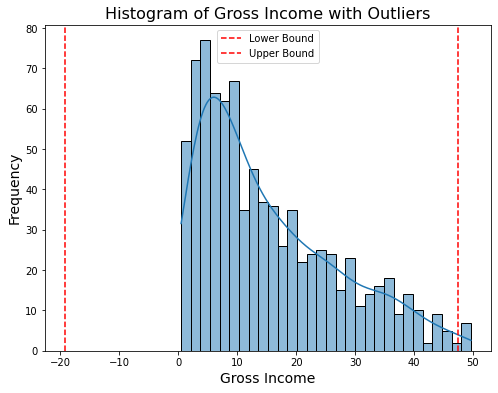

In [28]:
# create a figure with size (8, 6)
plt.figure(figsize=(8, 6))

# create a histogram with seaborn
sns.histplot(data=df_cleaned, x="gross income", kde=True, bins=30)

# get the quartiles and IQR
q1 = df["gross income"].quantile(0.25)
q3 = df["gross income"].quantile(0.75)
iqr = q3 - q1

# calculate the outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# add vertical lines for the lower and upper bounds
plt.axvline(x=lower_bound, color="red", linestyle="--", label="Lower Bound")
plt.axvline(x=upper_bound, color="red", linestyle="--", label="Upper Bound")

# set the title and labels
plt.title("Histogram of Gross Income with Outliers", fontsize=16)
plt.xlabel("Gross Income", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# add legend
plt.legend()

# show the plot
plt.show()

From the above code kde stands for kernel density estimation. When kde=True, a probability density curve will be plotted on top of the histogram, which is a smooth estimation of the underlying probability density function.

In other words, if kde=True, the histogram will show the distribution of the data, and the line will show the estimated probability density function of the data. This can be useful to get a better understanding of the shape of the distribution and can help to identify possible outliers or anomalies in the data.

The function for the histogram is sns.histplot()

The function plt.axvlin() is for the vertical lines you see.

Outliers will always fall outside the vertical lines.

The bins are a way to group data into intervals or ranges. Each bin represents a range of values along the x-axis of the histogram. The height of the bar over each bin represents the frequency or count of observations that fall within that range of values.

The number of bins is an important parameter to consider when creating a histogram. Too few bins may obscure important features of the data, while too many bins may overemphasize noise in the data. The number of bins can be adjusted depending on the size of the dataset and the nature of the data.


# 3.0 Data Analysis & Presentation

## I. Working with one Variable

### a. Frequency Tables

In [22]:
# create a table of City counts
city_table = df_cleaned['City'].value_counts()

freq_table = df['City'].value_counts().reset_index()
freq_table.columns = ['City', 'Frequency']

# append a total row
freq_table.loc['Total'] = ['Total', freq_table['Frequency'].sum()]

freq_table = freq_table.style\
    .set_properties(subset=['Frequency'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria'})\
    .set_properties(subset=['City'], **{'text-align': 'left', 'border': '1px solid black', 'font-family': 'Cambria'})\
    .set_caption('Frequency Table')\
    .hide_index()

freq_table

City,Frequency
Yangon,340
Mandalay,332
Naypyitaw,328
Total,1000


**Notes segment**
To get frequency we normally use the function .value_counts()
Just remember that a variable or column was called like this df['City'] to refer to the column City
and a dataset could be referred to any name from 'df' to 'df_cleaned' etc
In our case we are calling our dataFrame df_cleaned to imply the new dataset after the cleaning process. Hope you recall where we
did the cleaning and changed the dataset name. If we use 'df' the function will give result of the dirty dataset.

In the code below 'city_table' is the new table we create after first running the frquency

Second 'fre_table' is the table we get after reseting the index in the table (the index is the name of variable i.e City).

The .loc is an inbuilt function that creates a new row called total which constitute of the summation.

The .style\ is the inbuilt functino that changes the properties and font of the frequency table

### b. Percentages to the Tables

In [25]:
# create a table of City counts
city_table = df_cleaned['City'].value_counts()

freq_table = df['City'].value_counts().reset_index()
freq_table.columns = ['City', 'Frequency']

# append a total row
freq_table.loc['Total'] = ['Total', freq_table['Frequency'].sum()]

# add a percentage column
freq_table['Percentage'] = freq_table['Frequency'] / freq_table['Frequency'].sum() * 100

freq_table = freq_table.style\
    .format({'Frequency': '{:.0f}', 'Percentage': '{:.2f}%'})\
    .set_properties(subset=['Frequency'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria'})\
    .set_properties(subset=['City'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria'})\
    .set_properties(subset=['Percentage'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria'})\
    .set_caption('Frequency Table')\
    .hide_index()

freq_table

City,Frequency,Percentage
Yangon,340,17.00%
Mandalay,332,16.60%
Naypyitaw,328,16.40%
Total,1000,50.00%


**Notes segment**
In the code above, the part of the code .format({'Frequency': '{:.0f}', 'Percentage': '{:.2f}%'}) specifies the format for the Frequency and Percentage columns in the frequency table.

In particular, it uses the format() method to specify that the Frequency column should be formatted as a floating-point number with zero decimal places ({:.0f}), while the Percentage column should be formatted as a floating-point number with two decimal places followed by the percent sign ({:.2f}%).

By including this part of the code, the Frequency and Percentage columns in the frequency table will be displayed with the specified formatting.

The code format the frequency column as an integer and the percentage column as a float with two decimal places, and will align the percentage column to the right.

### c. Visualization for one Variable

#### i. Example One

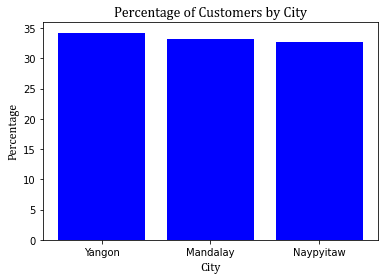

In [38]:

# create a table of City counts and percentages
city_table = df_cleaned['City'].value_counts(normalize=True) * 100
city_table = city_table.reset_index()
city_table.columns = ['City', 'Percentage']

# create the bar chart
plt.bar(city_table['City'], city_table['Percentage'], color='blue')
plt.title('Percentage of Customers by City', fontname='Cambria', color='black', fontsize=14)
plt.xlabel('City', fontname='Cambria', color='black', fontsize=12)
plt.ylabel('Percentage', fontname='Cambria', color='black', fontsize=12)
plt.show()

* Notes segment

**An Explanation of the Above Code**

city_table = df['City'].value_counts(normalize=True) * 100 - This line creates a table of the percentage of customers by city. It first counts the number of customers in each city using the value_counts() method and then divides the counts by the total number of customers to get the percentage. The normalize=True argument tells value_counts() to return the counts as percentages, and the * 100 at the end converts the decimal percentages to whole numbers.

city_table = city_table.reset_index() - This line resets the index of the city_table DataFrame. The value_counts() method returns a Series with the city names as the index, so resetting the index turns the Series into a DataFrame with a default integer index.

city_table.columns = ['City', 'Percentage'] - This line renames the columns of the city_table DataFrame to "City" and "Percentage" for easier reading.

plt.bar(city_table['City'], city_table['Percentage'], color='blue') - This line creates a bar chart of the percentage of customers by city. It uses the bar() function from the pyplot module of matplotlib to create the chart. The first argument is the x-axis values, which are the city names from the city_table DataFrame. The second argument is the y-axis values, which are the percentage values from the city_table DataFrame. The color argument sets the color of the bars to blue.

plt.title('Percentage of Customers by City', fontname='Cambria',color='black',fontsize=14) - This line sets the title of the chart to "Percentage of Customers by City". The fontname argument sets the font to Cambria, the color argument sets the font color to black, and the fontsize argument sets the font size to 14.

plt.xlabel('City', fontname='Cambria',color='black',fontsize=12) - This line sets the x-axis label to "City". The fontname argument sets the font to Cambria, the color argument sets the font color to black, and the fontsize argument sets the font size to 12.

plt.ylabel('Percentage', fontname='Cambria',color='black',fontsize=12) - This line sets the y-axis label to "Percentage". The fontname argument sets the font to Cambria, the color argument sets the font color to black, and the fontsize argument sets the font size to 12.

plt.show() - This line shows the plot in a new window.

#### ii. Example Two

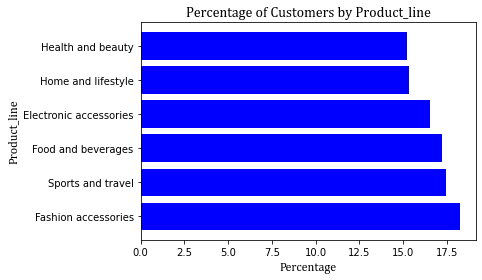

In [42]:
# create a table of Product_line counts and percentages
product_table = df_cleaned['Product_line'].value_counts(normalize=True) * 100
product_table = product_table.reset_index()
product_table.columns = ['Product_line', 'Percentage']

# create the horizontal bar chart
plt.barh(product_table['Product_line'], product_table['Percentage'], color='blue')
plt.title('Percentage of Customers by Product_line', fontname='Cambria', color='black', fontsize=14)
plt.xlabel('Percentage', fontname='Cambria', color='black', fontsize=12)
plt.ylabel('Product_line', fontname='Cambria', color='black', fontsize=12)
plt.show()

**Explanation to the Code**
The only difference between this code and the first one is that this is horizontal.
To flip the coordinates of the bar chart, we normally use barh instead of bar in the plt.bar function, which will create a horizontal bar chart.
We flip the x axis in event long texts have been used in the variable index.

## II. Working With Two Variable

### a. Frequency Tables

In [51]:
# create a frequency table of gross income by product line
income_table = df_cleaned.groupby('Product_line')['gross income'].sum().reset_index()

# create a styled table
income_table = income_table.style.set_caption('Total Gross Income by Product Line')\
    .format({'gross income': '{:.2f}'})\
    .set_properties(subset=['Product_line'], **{'text-align': 'left', 'border': '1px solid black', 'font-family': 'Cambria'})\
    .set_properties(subset=['gross income'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria', 'precision': 2, 'prefix': '$'})\
    .hide_index()

# display the table
income_table

Product_line,gross income
Electronic accessories,2111.80
Fashion accessories,2329.27
Food and beverages,2252.08
Health and beauty,1976.10
Home and lifestyle,2132.71
Sports and travel,2317.32


** Explanation of the Code**

* The first part which is a code for frequency table creates a frequency table of the total gross income for each product line by grouping the cleaned data frame (df_cleaned) by the Product_line column and then summing the gross income column within each group.

* This is followed by creating a styled table which applies various styling to the frequency table created in the previous code block. It sets the caption of the table to "Total Gross Income by Product Line". It formats the gross income column to display with no decimal places. It sets the alignment, border, and font family for the Product_line column and the gross income column. It also specifies that the gross income column should be displayed with a dollar sign prefix and two decimal places of precision. Finally, it hides the index column (the column with the row numbers).

* Then finally, we display the table to see a print of the frequency.

### b. Percentages to the Tables

In [59]:
# create a frequency table of gross income by product line
income_table = df_cleaned.groupby('Product_line')['gross income'].agg(['sum', 'count']).reset_index()
income_table.columns = ['Product_line', 'Total Gross Income', 'Count']

# calculate the percentage column
income_table['Percentage'] = income_table['Total Gross Income'] / income_table['Total Gross Income'].sum()* 100

# sort by 'Total Gross Income' in descending order
income_table = income_table.sort_values('Total Gross Income', ascending=False)

# create a styled table
income_table = income_table.style.set_caption('Total Gross Income and Count by Product Line') \
    .format({'Total Gross Income': '${:,.0f}', 'Percentage': '{:.2f}%'}) \
    .set_properties(subset=['Product_line'], **{'text-align': 'left', 'border': '1px solid black', 'font-family': 'Cambria'}) \
    .set_properties(subset=['Total Gross Income', 'Count', 'Percentage'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria'}) \
    .hide_index()

# display the table
income_table

Product_line,Total Gross Income,Count,Percentage
Fashion accessories,"$2,329",159,17.75%
Sports and travel,"$2,317",148,17.66%
Food and beverages,"$2,252",148,17.17%
Home and lifestyle,"$2,133",131,16.26%
Electronic accessories,"$2,112",140,16.10%
Health and beauty,"$1,976",132,15.06%


### c. Visualization

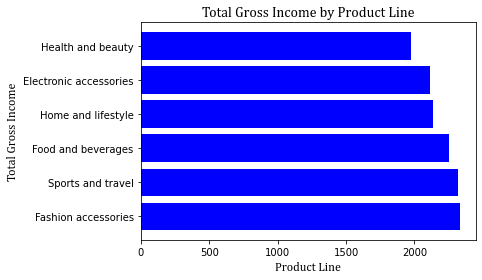

In [63]:
# create a frequency table of gross income by product line
income_table = df_cleaned.groupby('Product_line')['gross income'].agg(['sum', 'count']).reset_index()
income_table.columns = ['Product_line', 'Total Gross Income', 'Count']

# calculate the percentage column
income_table['Percentage'] = income_table['Total Gross Income'] / income_table['Total Gross Income'].sum() * 100
income_table = income_table.sort_values('Total Gross Income', ascending=False)

# create a styled table
income_table_styled = income_table.style.set_caption('Total Gross Income and Count by Product Line') \
    .format({'Total Gross Income': '${:,.0f}', 'Percentage': '{:.2f}%'}) \
    .set_properties(subset=['Product_line'], **{'text-align': 'left', 'border': '1px solid black', 'font-family': 'Cambria'}) \
    .set_properties(subset=['Total Gross Income', 'Count', 'Percentage'], **{'text-align': 'center', 'border': '1px solid black', 'font-family': 'Cambria'}) \
    .hide_index()

# create the bar chart
import matplotlib.pyplot as plt

plt.barh(income_table['Product_line'], income_table['Total Gross Income'], color='blue')
plt.title('Total Gross Income by Product Line', fontname='Cambria', color='black', fontsize=14)
plt.xlabel('Product Line', fontname='Cambria', color='black', fontsize=12)
plt.ylabel('Total Gross Income', fontname='Cambria', color='black', fontsize=12)
#plt.xticks(rotation=45)
plt.show()
